In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sb
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.simplefilter(action="ignore")

In [2]:
df = pd.read_csv("/home/at70870/Downloads/ValMrArt-pred-50565.csv", index_col=0)
df

,mean,std,file,label
0,1.085668,0.350062,sub-000103_ses-standard_space-MNI152NLin2009cS...,0
1,1.215870,0.383190,sub-000103_ses-headmotion1_space-MNI152NLin200...,1
2,1.290501,0.377527,sub-000103_ses-headmotion2_space-MNI152NLin200...,2
3,1.068518,0.358825,sub-000148_ses-standard_space-MNI152NLin2009cS...,0
4,1.117968,0.390068,sub-000148_ses-headmotion1_space-MNI152NLin200...,2
...,...,...,...,...
84,1.208264,0.393156,sub-750675_ses-headmotion1_space-MNI152NLin200...,2
85,1.104945,0.434742,sub-750675_ses-headmotion2_space-MNI152NLin200...,2
86,1.165283,0.346964,sub-862915_ses-standard_space-MNI152NLin2009cS...,0
87,1.300297,0.358672,sub-862915_ses-headmotion1_space-MNI152NLin200...,2


<Axes: xlabel='label', ylabel='mean'>

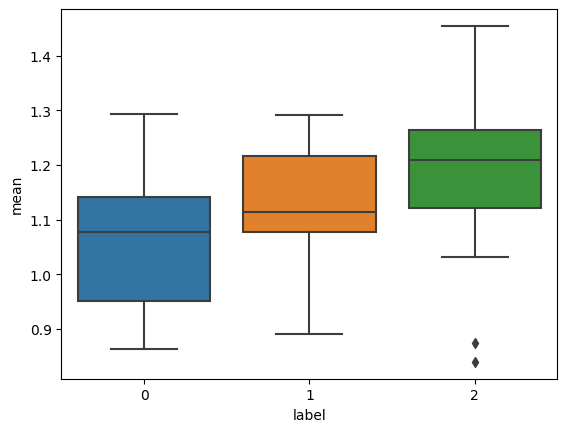

In [33]:
sb.boxplot(df, x="label", y="mean")

<Axes: xlabel='mean'>

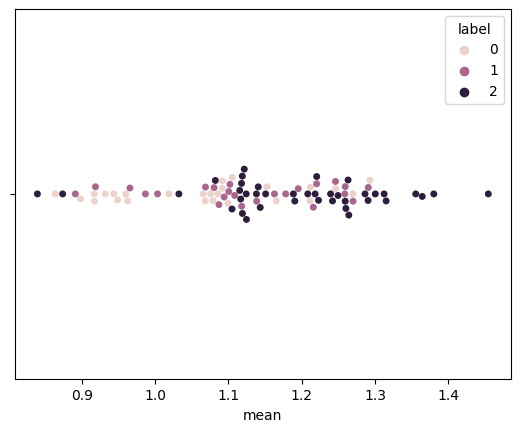

In [7]:
sb.swarmplot(df, x="mean", hue="label")

In [39]:
x_train = df["mean"].to_numpy().reshape(-1,1)


In [47]:
model = KMeans(n_clusters=3)
model.fit(x_train, df['label'])
model.score(x_train, df['label'])

-0.05080014973142336

Cluster centers (centroids):
[0.9418172  1.10853054 1.26129025]
Thresholds:
[1.0251738712812748, 1.1849103939075358]


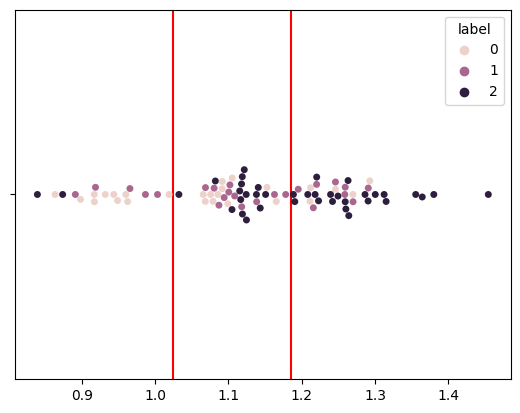

In [53]:
centers = model.cluster_centers_.flatten()
centers = np.sort(centers)  # Sort centers to make threshold extraction easier

print("Cluster centers (centroids):")
print(centers)
thresholds = [(centers[i] + centers[i + 1]) / 2 for i in range(len(centers) - 1)]

print("Thresholds:")
print(thresholds)
sb.swarmplot(x=df["mean"].to_numpy(), hue=df["label"].to_numpy())
plt.axvline(x = thresholds[0], color = 'r' )
plt.axvline(x = thresholds[1], color = 'r')
plt.legend(title="label")
